In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

import seaborn as sns
sns.set(style='white')
%matplotlib inline

In [4]:
imdb=pd.read_csv('imdb_top_1000.csv')
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
imdb.shape

(1000, 16)

In [6]:
imdb.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [9]:
import missingno as mino

<AxesSubplot:>

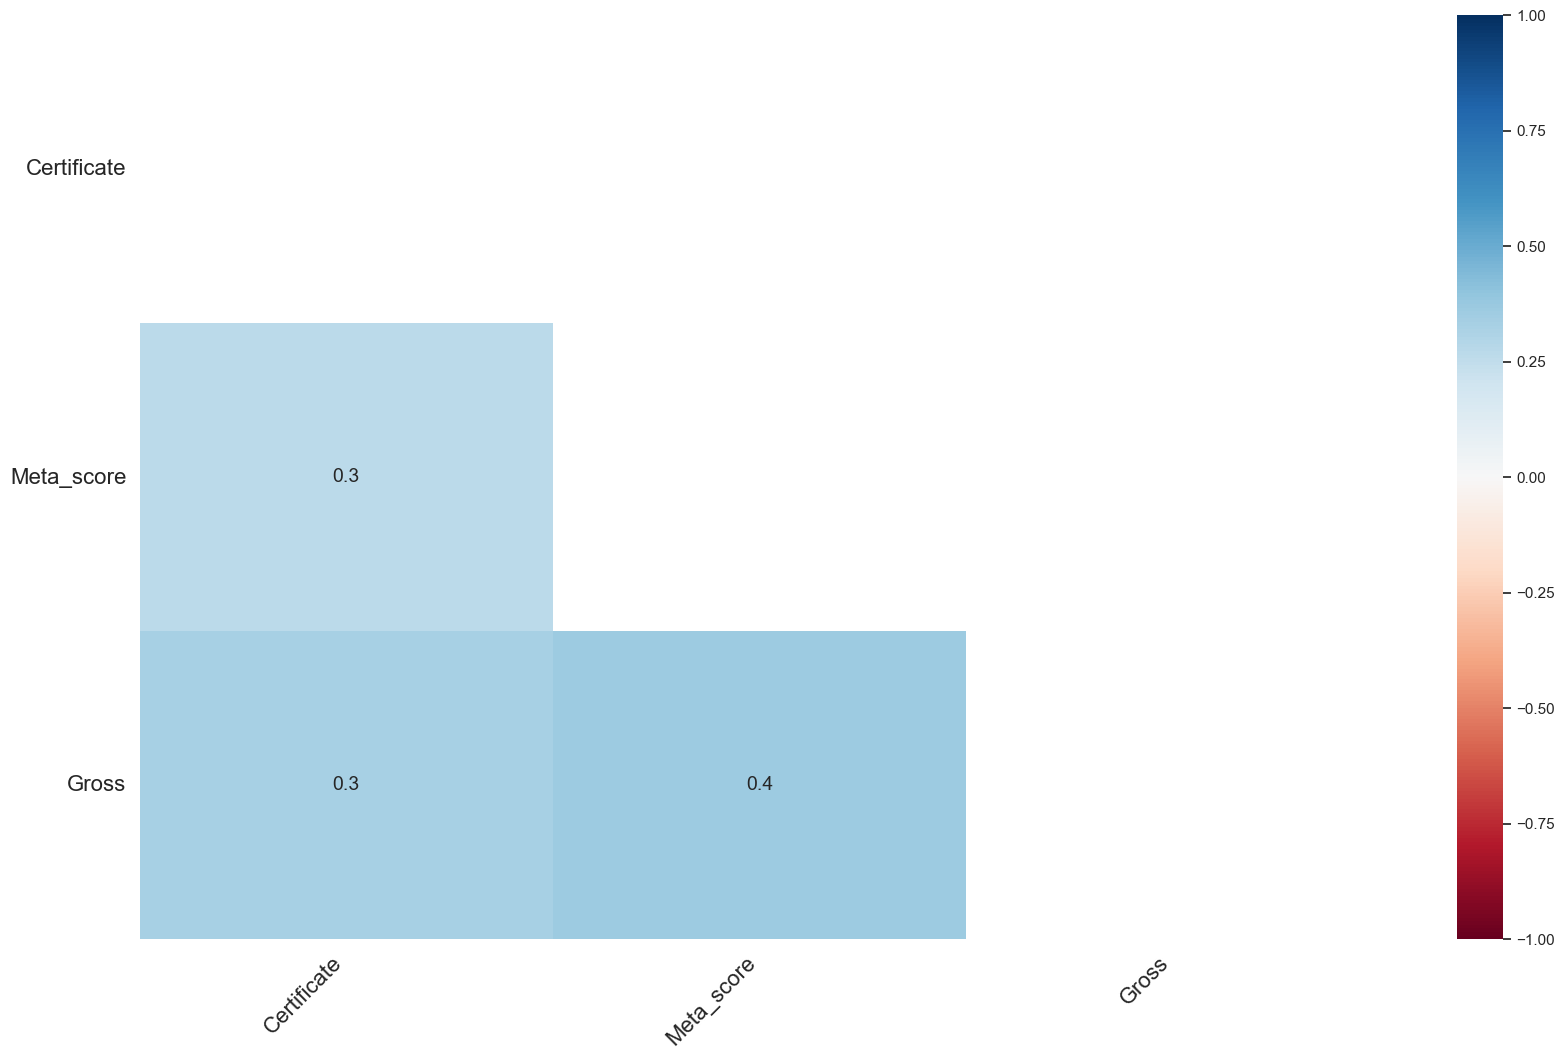

In [10]:
mino.heatmap(imdb)

<AxesSubplot:>

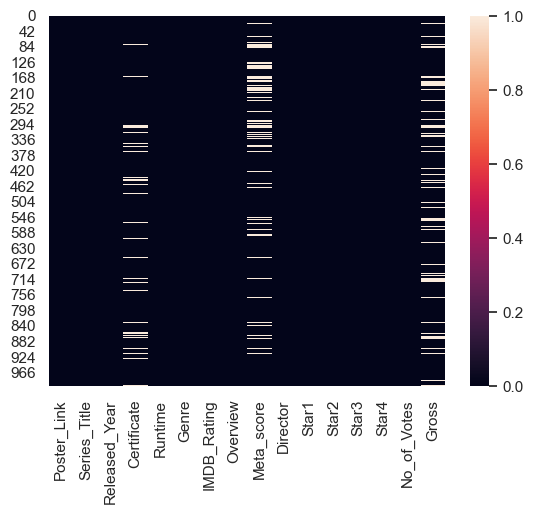

In [12]:
sns.heatmap(imdb.isnull())

In [23]:
imdb['Gross'].unique

<bound method Series.unique of 0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object>

In [24]:
imdb['Runtime'].unique

<bound method Series.unique of 0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object>

In [37]:
imdb['Gross']=imdb['Gross'].str.replace(',','').astype('float')
imdb['Runtime']=imdb['Runtime'].apply(lambda text:text.split()[0]).astype('int')

In [39]:
imdb.Gross

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995            NaN
996            NaN
997     30500000.0
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: float64

In [40]:
imdb['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int32

In [41]:
imdb['Certificate']=imdb['Certificate'].replace(np.nan,'unknown')
imdb['Meta_score']=imdb['Meta_score'].replace(np.nan,np.mean(imdb['Meta_score']))
imdb['Gross']=imdb['Gross'].replace(np.nan,np.mean(imdb['Gross']))

In [42]:
imdb.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [57]:
fig=px.histogram(data_frame=imdb.sort_values(by='Released_Year'),x='Released_Year',color_discrete_sequence=['gold'])
fig.update_layout(font=dict(family='Lato',size=18,color='white'),
                  title=dict(text='Distribution of IMDB 1920 to now',font=dict(size=30),x=.5),
                             paper_bgcolor='black',plot_bgcolor='black',xaxis=dict(title='Year of release'),
                             yaxis=dict(showgrid=False))

In [58]:
imdb.Genre.unique

<bound method Series.unique of 0                         Drama
1                  Crime, Drama
2          Action, Crime, Drama
3                  Crime, Drama
4                  Crime, Drama
                 ...           
995      Comedy, Drama, Romance
996              Drama, Western
997         Drama, Romance, War
998                  Drama, War
999    Crime, Mystery, Thriller
Name: Genre, Length: 1000, dtype: object>

In [59]:
imdb['genre']=imdb['Genre'].apply(lambda text: text.split(',')[0])

In [60]:
imdb['genre']

0       Drama
1       Crime
2      Action
3       Crime
4       Crime
        ...  
995    Comedy
996     Drama
997     Drama
998     Drama
999     Crime
Name: genre, Length: 1000, dtype: object

In [62]:
imdb.drop(columns='Genre',inplace=True)

In [63]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genre'],
      dtype='object')

In [67]:
imdb.genre.value_counts()

Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: genre, dtype: int64

## Bar plot

In [94]:
def bar_plot(column_name,data_frame=imdb,tribe='value_counts',by=None,limit=3,**kwags):
    #checking column name
    if type(column_name)!= str or column_name not in data_frame.columns:
        raise ValueError('incorrect column name or value')
    #sorted data frame
    if tribe=='sort':
        #if column is not in df
        if not by or by not in data_frame.columns:
            raise ValueError('by parameter must be a column from df1 ')
        data=data_frame.sort_values(by=by,ascending=False).head(limit)
        y = data[by].values
        x = data[column_name]
        title = by
        
    # evolve counts
    elif tribe == 'value_counts':
        data= data_frame[column_name].value_counts().head(limit)

        x = data.index
        y=data.values
        title=column_name
        
        
    fig=px.bar(x=x,y=y,color_discrete_sequence=['gold'])
    fig.update_layout(font=dict(family='Lato',size=18,color='white'),
                      title=dict(text=f'IMDB movies - {title}',font=dict(size=30),x=.5),
                                paper_bgcolor='black',plot_bgcolor='black',xaxis=dict(title=f'{title}'),
                                yaxis=dict(title='count',showgrid=False))
    fig.show()

In [96]:
bar_plot('genre',limit=5)

In [102]:
bar_plot('genre',limit=11,tribe='sort',by='Gross')

In [103]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'genre'],
      dtype='object')

## Scatter plot

In [113]:
fig=px.scatter(imdb,x='Gross',y='No_of_Votes',hover_data=['Series_Title'],color='genre')
fig.update_layout(font=dict(family='Lato',size=18,color='white'),
                      title=dict(text=f'IMDB movies - SCATTER PLOT',font=dict(size=30),x=.5),
                                paper_bgcolor='black',plot_bgcolor='black',xaxis=dict(title='Gross',showgrid=False),
                                yaxis=dict(title='No_of_Votes',showgrid=False))

In [116]:
fig=px.scatter(imdb,x='Director',y='IMDB_Rating',hover_data=['Series_Title'],color='genre')
fig.update_layout(font=dict(family='Lato',size=18,color='white'),
                      title=dict(text='Best director',font=dict(size=30),x=.5),
                                paper_bgcolor='black',plot_bgcolor='black',xaxis=dict(title='Director',showgrid=False),
                                yaxis=dict(title='IMDB_Rating',showgrid=False))

In [118]:
# top 3 highest gross
bar_plot('Series_Title',tribe='sort',by='Gross',limit=5)

## Run time

In [125]:
bar_plot('Series_Title',tribe='sort',by='Runtime')

## Rating

In [126]:
bar_plot('Series_Title',tribe='sort',by='IMDB_Rating')

# certificate

In [133]:
bar_plot('Certificate',limit=10)

## Meta score

In [136]:
bar_plot('Series_Title',tribe='sort',by='Meta_score')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Directors

In [151]:
bar_plot('Director',limit=10)

In [153]:
roles=['Star1','Star2','Star3','Star4']
for stars in roles:
    bar_plot(stars,limit=5)

In [154]:
top_voted=imdb.sort_values(['No_of_Votes'],ascending=False)
top_voted

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,9.3,Two imprisoned men bond over a number of years...,False,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07,Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,9.0,When the menace known as the Joker wreaks havo...,False,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08,Action
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,8.8,A thief who steals corporate secrets through t...,False,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,2.925762e+08,Action
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,8.8,An insomniac office worker and a devil-may-car...,False,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,3.703010e+07,Drama
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,8.9,"The lives of two mob hitmen, a boxer, a gangst...",False,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,1.079288e+08,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,https://m.media-amazon.com/images/M/MV5BZmVhN2...,Raazi,2018,UA,138,7.8,A Kashmiri woman agrees to marry a Pakistani a...,False,Meghna Gulzar,Alia Bhatt,Vicky Kaushal,Rajit Kapoor,Shishir Sharma,25344,6.803475e+07,Action
718,https://m.media-amazon.com/images/M/MV5BYmMxZT...,Scarface: The Shame of the Nation,1932,PG,93,7.8,An ambitious and nearly insane violent gangste...,False,Howard Hawks,Richard Rosson,Paul Muni,Ann Dvorak,Karen Morley,25312,6.803475e+07,Action
694,https://m.media-amazon.com/images/M/MV5BYjhhMD...,La planète sauvage,1973,U,72,7.8,"On a faraway planet where blue giants rule, op...",False,René Laloux,Barry Bostwick,Jennifer Drake,Eric Baugin,Jean Topart,25229,1.938170e+05,Animation
721,https://m.media-amazon.com/images/M/MV5BNjRhYz...,God's Own Country,2017,unknown,104,7.7,Spring. Yorkshire. Young farmer Johnny Saxby n...,False,Francis Lee,Josh O'Connor,Alec Secareanu,Gemma Jones,Ian Hart,25198,3.356090e+05,Drama


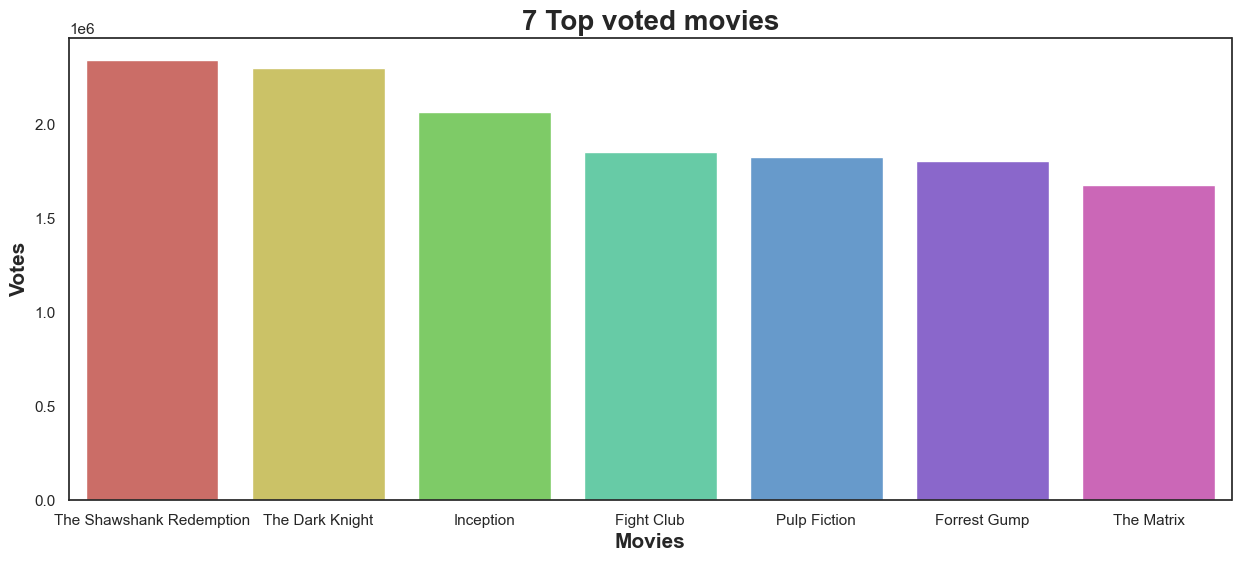

In [163]:
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7],palette='hls')
plt.title('7 Top voted movies',fontsize=20,fontweight='bold')
plt.xlabel('Movies',fontsize=15,fontweight='bold')
plt.ylabel('Votes',fontsize=15,fontweight='bold')
plt.show()

In [166]:
top_gross=imdb.sort_values(['Gross'],ascending=False)
top_gross

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,7.9,"As a new threat to the galaxy rises, Rey, a de...",False,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Action
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181,8.4,After the devastating events of Avengers: Infi...,False,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,Action
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162,7.8,A paraplegic Marine dispatched to the moon Pan...,False,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,Action
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149,8.4,The Avengers and their allies must be willing ...,False,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0,Action
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194,7.8,A seventeen-year-old aristocrat falls in love ...,False,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,https://m.media-amazon.com/images/M/MV5BMTgzMT...,Ajeossi,2010,R,119,7.8,A quiet pawnshop keeper with a violent past ta...,False,Jeong-beom Lee,Won Bin,Sae-ron Kim,Tae-hoon Kim,Hee-won Kim,62848,6460.0,Action
926,https://m.media-amazon.com/images/M/MV5BMTI5Mz...,Dead Man's Shoes,2004,unknown,90,7.6,A disaffected soldier returns to his hometown ...,False,Shane Meadows,Paddy Considine,Gary Stretch,Toby Kebbell,Stuart Wolfenden,49728,6013.0,Crime
624,https://m.media-amazon.com/images/M/MV5BMTg4OD...,Mr. Nobody,2009,R,141,7.8,A boy stands on a station platform as a train ...,False,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,3600.0,Drama
390,https://m.media-amazon.com/images/M/MV5BMTk2Mj...,Knockin' on Heaven's Door,1997,unknown,87,8.0,Two terminally ill patients escape from a hosp...,False,Thomas Jahn,Til Schweiger,Jan Josef Liefers,Thierry van Werveke,Moritz Bleibtreu,27721,3296.0,Action


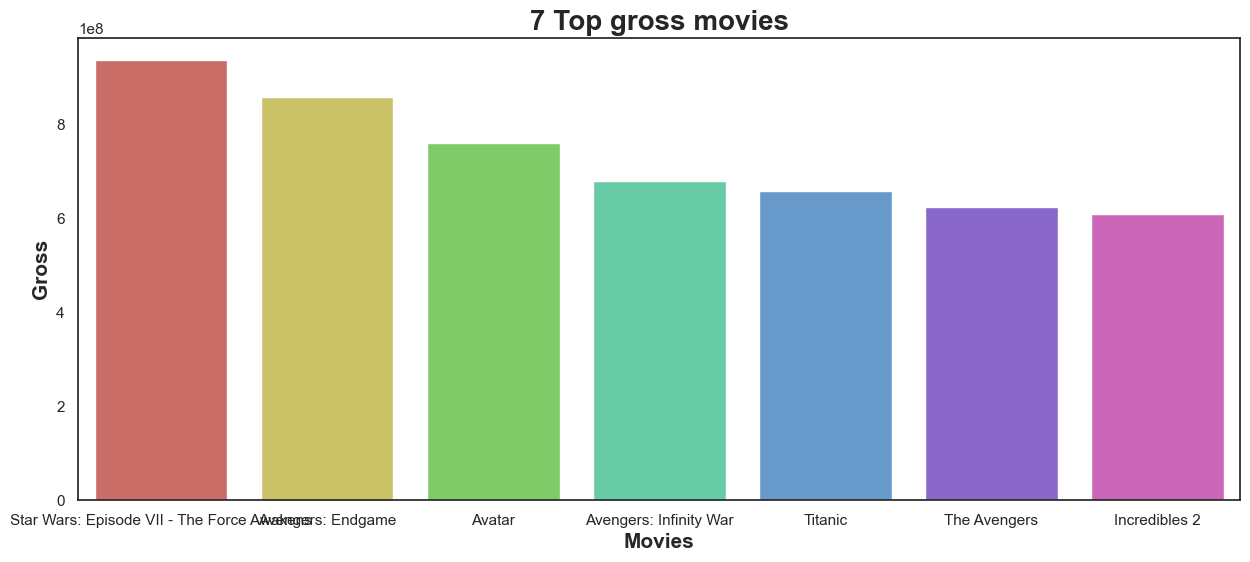

In [168]:
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=top_gross['Series_Title'][:7],y=top_gross['Gross'][:7],palette='hls')
plt.title('7 Top gross movies',fontsize=20,fontweight='bold')
plt.xlabel('Movies',fontsize=15,fontweight='bold')
plt.ylabel('Gross',fontsize=15,fontweight='bold')
plt.show()

In [169]:
top_gross_dir=imdb.groupby(['Director'])['No_of_Votes'].sum().reset_index()
top_gross_dir.columns=['Director','Gross']
top_gross_dir

,Director,Gross
0,Aamir Khan,168895
1,Aaron Sorkin,89896
2,Abdellatif Kechiche,138741
3,Abhishek Chaubey,27175
4,Abhishek Kapoor,32628
...,...,...
543,Zack Snyder,1233675
544,Zaza Urushadze,40382
545,Zoya Akhtar,99813
546,Çagan Irmak,78925


In [175]:
top_7_rated_dir=imdb.sort_values(by='Gross',ascending=False).reset_index().drop('index',axis=1)
top_7_rated_dir

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre
0,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,7.9,"As a new threat to the galaxy rises, Rey, a de...",False,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,Action
1,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181,8.4,After the devastating events of Avengers: Infi...,False,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,Action
2,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162,7.8,A paraplegic Marine dispatched to the moon Pan...,False,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,Action
3,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149,8.4,The Avengers and their allies must be willing ...,False,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0,Action
4,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194,7.8,A seventeen-year-old aristocrat falls in love ...,False,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BMTgzMT...,Ajeossi,2010,R,119,7.8,A quiet pawnshop keeper with a violent past ta...,False,Jeong-beom Lee,Won Bin,Sae-ron Kim,Tae-hoon Kim,Hee-won Kim,62848,6460.0,Action
996,https://m.media-amazon.com/images/M/MV5BMTI5Mz...,Dead Man's Shoes,2004,unknown,90,7.6,A disaffected soldier returns to his hometown ...,False,Shane Meadows,Paddy Considine,Gary Stretch,Toby Kebbell,Stuart Wolfenden,49728,6013.0,Crime
997,https://m.media-amazon.com/images/M/MV5BMTg4OD...,Mr. Nobody,2009,R,141,7.8,A boy stands on a station platform as a train ...,False,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,3600.0,Drama
998,https://m.media-amazon.com/images/M/MV5BMTk2Mj...,Knockin' on Heaven's Door,1997,unknown,87,8.0,Two terminally ill patients escape from a hosp...,False,Thomas Jahn,Til Schweiger,Jan Josef Liefers,Thierry van Werveke,Moritz Bleibtreu,27721,3296.0,Action


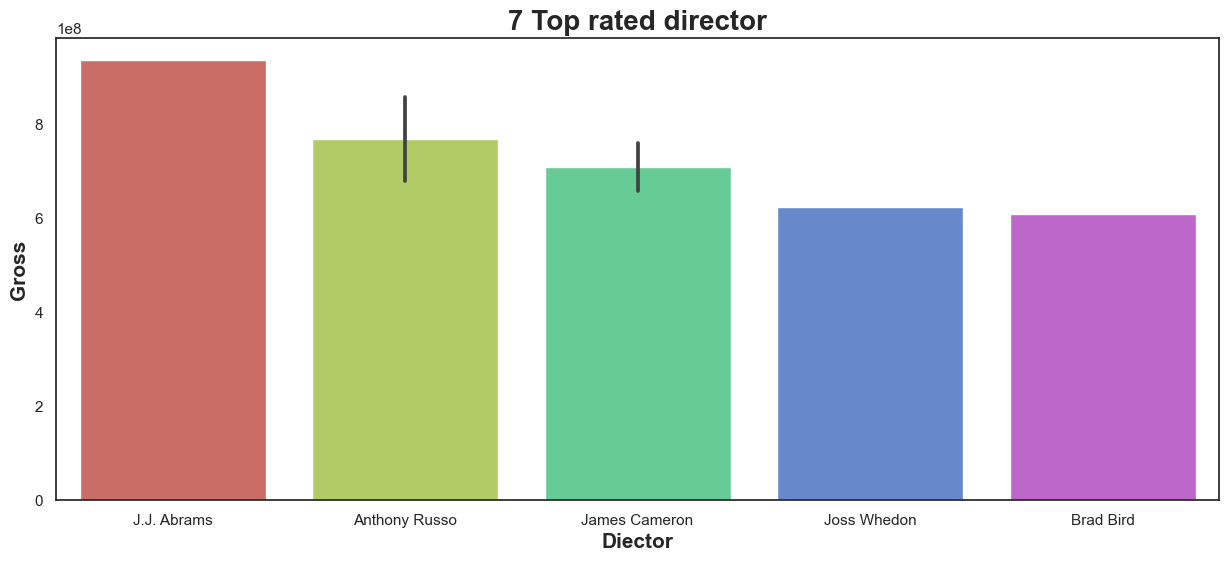

In [178]:
fig,ax=plt.subplots(figsize=(15,6))
sns.barplot(x=top_7_rated_dir['Director'][:7],y=top_7_rated_dir['Gross'][:7],palette='hls')
plt.title('7 Top rated director',fontsize=20,fontweight='bold')
plt.xlabel('Diector',fontsize=15,fontweight='bold')
plt.ylabel('Gross',fontsize=15,fontweight='bold')
plt.show()